### Capston project - Netflix movies - preparation

In [44]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
pd.set_option("mode.chained_assignment", None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt



In [2]:
#Dataset source: https://www.kaggle.com/miroslavsabo/young-people-survey
df = pd.read_csv('titles.csv')

### Check dataframe shape and size
First we need to look how big is our dataframe and if there is more rows than columns.

In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print('There are {0} rows and {1} columns in our dataset. It looks {2}OK.'.format(num_rows, num_cols, 'NOT ' if (num_rows<num_cols) else ''))
df.head() #Take a first look on our dataset

There are 5850 rows and 15 columns in our dataset. It looks OK.


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
df.describe() #Take a first look on our dataset

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


### Look for NaN

In [5]:
df.isna().mean()

id                      0.000000
title                   0.000171
type                    0.000000
description             0.003077
release_year            0.000000
age_certification       0.447692
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.640000
imdb_id                 0.068889
imdb_score              0.082393
imdb_votes              0.085128
tmdb_popularity         0.015556
tmdb_score              0.053162
dtype: float64

### Inpute or delete?
As we can see there are large amount of missing data in two columns age_certification and seasons. We are not interested in data in these two columns so we decided to drop them. Rest data has small amount of NaN so we have decided to drop lines containing NaN.

In [6]:
df.age_certification.unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [7]:
df.seasons.unique()

array([ 1., nan,  4.,  9., 24.,  5., 39., 10., 13., 42., 25., 21., 37.,
        8., 29.,  7., 11., 14., 12.,  6., 32., 15., 19.,  2., 20.,  3.,
       16.])

In [8]:
subset = df[['id', 'title', 'type', 'description', 'release_year', 'runtime', 'genres', 'production_countries', 'imdb_id', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score']]

In [9]:
subset = subset.dropna()

In [10]:
subset.isnull().mean()

id                      0.0
title                   0.0
type                    0.0
description             0.0
release_year            0.0
runtime                 0.0
genres                  0.0
production_countries    0.0
imdb_id                 0.0
imdb_score              0.0
imdb_votes              0.0
tmdb_popularity         0.0
tmdb_score              0.0
dtype: float64

In [11]:
subset.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0,17.617,8.306


### Categhorical variables and Dummies...
Now we need to convert "genres" columns into the dummies. However we cant use get_dummies() due to bad design of our CSV. As we can see we have all genres in one array. First we need to strip some extra characters and after that we should be able to manually convert cathegorical variables into dummies.

In [12]:
subset['genres']

1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
5                            ['comedy', 'european']
                           ...                     
5838                           ['drama', 'romance']
5842                        ['animation', 'family']
5843                 ['romance', 'comedy', 'drama']
5847                                     ['comedy']
5849              ['family', 'animation', 'comedy']
Name: genres, Length: 5129, dtype: object

In [13]:
# Remove extra characters and split all genres to get unique values
subset['genres'] = subset['genres'].str.replace("'","",regex=False)
subset['genres'] = subset['genres'].str.replace('[',"",regex=False)
subset['genres'] = subset['genres'].str.replace(']',"",regex=False)
subset['genres'] = subset['genres'].str.replace(' ',"",regex=False)
genres = subset['genres'].str.split(',', expand=True)

In [14]:
# We need to create new series with unique values which will be used to create dummy colums manually
array_genres_value_list = []
for col in genres:
    array_genres_value_list.extend(genres[col].unique())
genres_value_list = pd.Series(list(array_genres_value_list)).unique()

In [15]:
# just a little cleanup - None and space are removed
genres_value_list
genres_value_list = genres_value_list[~pd.isnull(genres_value_list)]
genres_value_list = np.delete(genres_value_list,17)
genres_value_list

array(['drama', 'fantasy', 'war', 'comedy', 'thriller', 'crime',
       'romance', 'action', 'western', 'history', 'documentation',
       'music', 'horror', 'scifi', 'animation', 'family', 'reality',
       'sport', 'european'], dtype=object)

In [16]:
# manually create dummy columns
for i in genres_value_list:
    subset[i]=0

In [17]:
# fill dummies with proper values
for i in range(0, len(subset)):
    #print(subset.iloc[i]['genres'])
    for label in genres_value_list:
        #if subset['genres'].iloc[i].find(label)>=0: print(subset.iloc[i]['id']+label)
        #subset.iloc[i][label] = np.where(subset['genres'].iloc[i].find(label)>=0, 1, subset.iloc[i][label])
        if subset['genres'].iloc[i].find(label)>=0: 
            subset[label].iloc[i] = 1
        else:
            subset[label].iloc[i] = 0

In [18]:
subset.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,drama,fantasy,war,comedy,thriller,crime,romance,action,western,history,documentation,music,horror,scifi,animation,family,reality,sport,european
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"drama,crime",['US'],tt0075314,8.2,808582.0,40.965,8.179,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"drama,action,thriller,european",['US'],tt0068473,7.7,107673.0,10.010,7.300,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"fantasy,action,comedy",['GB'],tt0071853,8.2,534486.0,15.461,7.811,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"war,action","['GB', 'US']",tt0061578,7.7,72662.0,20.398,7.600,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,"comedy,european",['GB'],tt0063929,8.8,73424.0,17.617,8.306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Do we need all columns?
As we are interested only in movie titles and genres we have decided to drop other columns

In [19]:
# create subset ready for saving and model training
fd = subset[['title','drama', 'fantasy', 'war', 'comedy', 'thriller', 'crime',
       'romance', 'action', 'western', 'history', 'documentation',
       'music', 'horror', 'scifi', 'animation', 'family', 'reality',
       'sport', 'european']]
fd.head()

,title,drama,fantasy,war,comedy,thriller,crime,romance,action,western,history,documentation,music,horror,scifi,animation,family,reality,sport,european
1,Taxi Driver,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Deliverance,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Monty Python and the Holy Grail,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,The Dirty Dozen,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Monty Python's Flying Circus,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Visualisation of our data ?
What is the proportion of movie geners in our dataset?

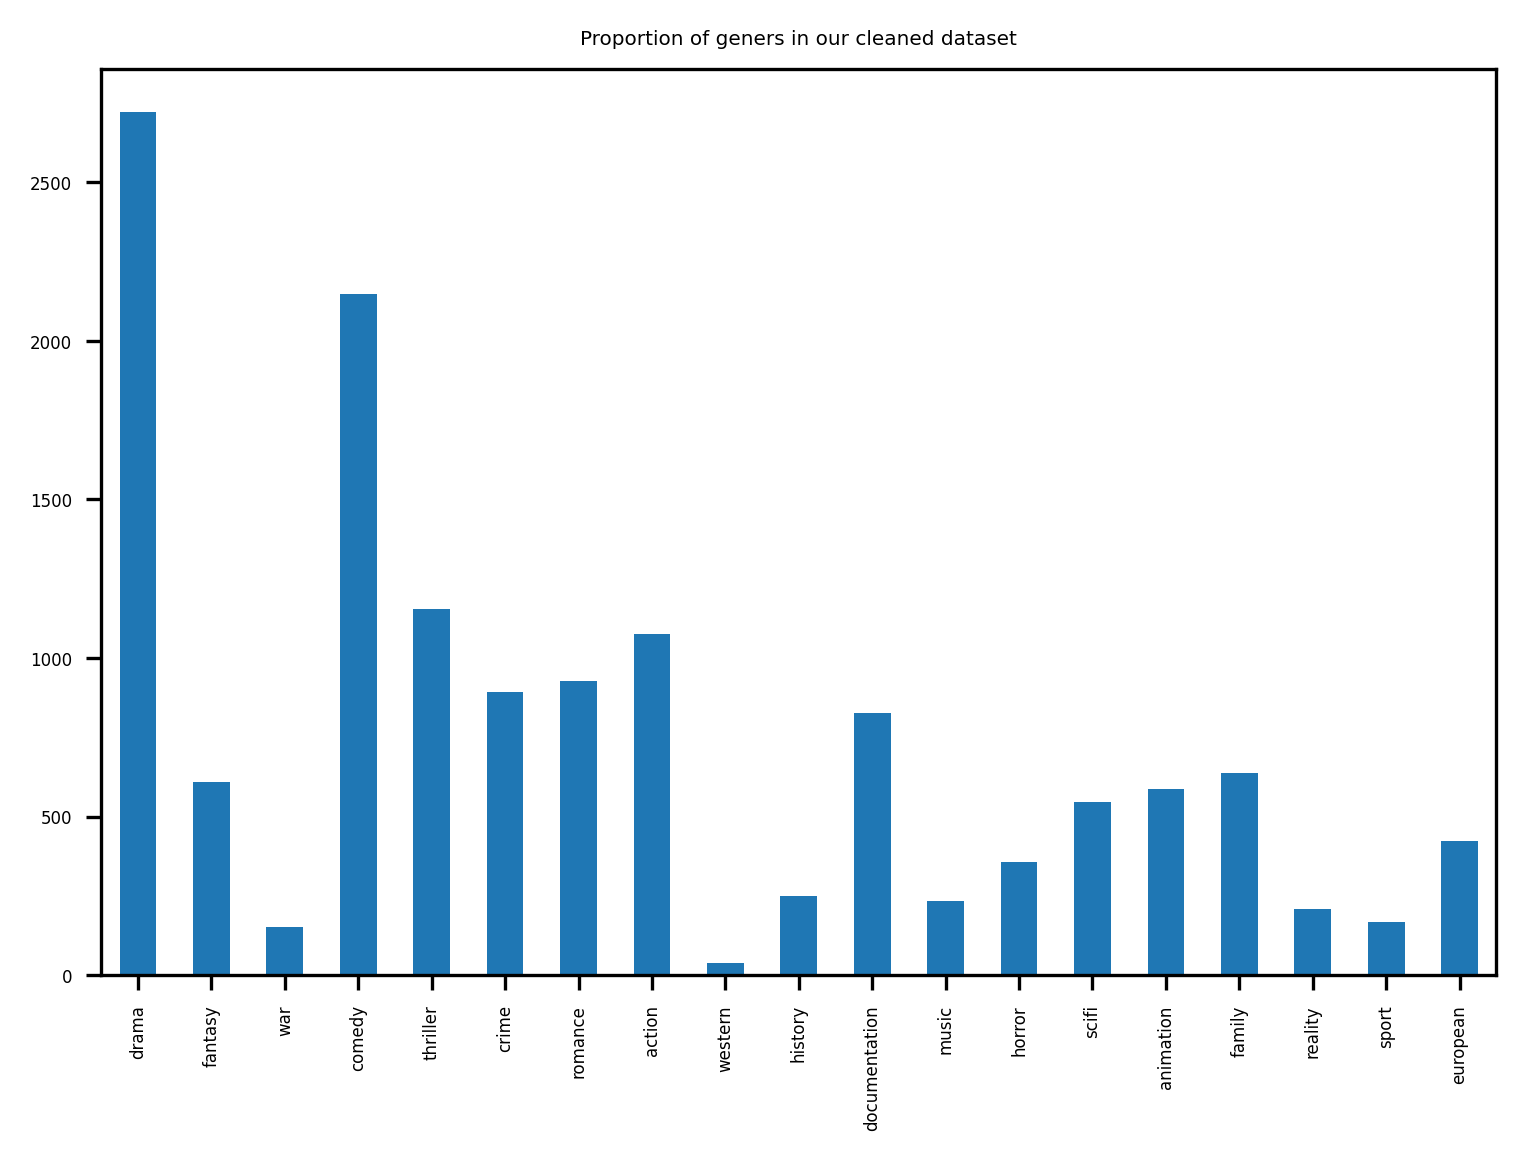

In [52]:
fd[['drama', 'fantasy', 'war', 'comedy', 'thriller', 'crime',
       'romance', 'action', 'western', 'history', 'documentation',
       'music', 'horror', 'scifi', 'animation', 'family', 'reality',
       'sport', 'european']].sum().plot(kind="bar")
plt.title("Proportion of geners in our cleaned dataset");


It looks like our dataset is not perfect because we have large number of drama ande comedy movies however almost no movies from war and western category. For our PoC it should be sufficient because other geners are more less proportional however in future we should consider find also other datasets and try to creat more proportional dataset.

### Last step - saving dataframe into sql DB

In [20]:
engine = create_engine('sqlite:///app/moviesdata.db')
fd.to_sql('name', con=engine, index=False, if_exists='replace')

5129